In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [49]:
def getCSV(csv):
    dfl = pd.read_csv(csv)
    return dfl
df = getCSV(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\TotalLivestock.csv') 
print(df)

                  STATISTIC Label  Year     Type of Animal  \
0     Number of Livestock in June  2015       Total cattle   
1     Number of Livestock in June  2015       Total cattle   
2     Number of Livestock in June  2015       Total cattle   
3     Number of Livestock in June  2015       Total cattle   
4     Number of Livestock in June  2015       Total cattle   
...                           ...   ...                ...   
3658  Number of Livestock in June  2023  Total farmed deer   
3659  Number of Livestock in June  2023  Total farmed deer   
3660  Number of Livestock in June  2023  Total farmed deer   
3661  Number of Livestock in June  2023  Total farmed deer   
3662  Number of Livestock in June  2023  Total farmed deer   

                    Region      UNIT   VALUE  
0                    State  000 Head  6963.5  
1     Northern and Western  000 Head  1723.9  
2                   Border  000 Head   793.6  
3                     West  000 Head   930.2  
4                 So

In [114]:
year = 2022
filtered_df = df[df['Year'] == year]
grouped = filtered_df.groupby('Type of Animal', as_index=False).sum()
#grouped['Type of Animal'] = grouped['Type of Animal'].apply(lambda x: x if x[:6] == "Total " else "")
print(grouped)

                     Type of Animal   Year    VALUE
0                             Boars  22242      2.8
1                     Breeding pigs  22242    411.6
2                    Breeding sheep  22242   9162.0
3                             Bulls  22242    145.0
4          Cattle female: 1-2 years  22242   3150.5
5   Cattle female: 2 years and over  22242   1066.0
6       Cattle female: under 1 year  22242   3398.2
7            Cattle male: 1-2 years  22242   2662.8
8     Cattle male: 2 years and over  22242   1139.9
9         Cattle male: under 1 year  22242   3005.4
10                Cattle: 1-2 years  22242   5813.0
11         Cattle: 2 years and over  22242   2205.7
12             Cattle: under 1 year  22242   6403.3
13                             Cows  22242   7621.5
14                       Dairy cows  22242   4882.1
15                             Ewes  22242   8911.3
16           Ewes: 2 years and over  22242   6960.2
17              Ewes: under 2 years  22242   1951.1
18          

In [115]:
for index,row in grouped.iterrows():
    if ("Total" not in row['Type of Animal']) or ("Total cattle: " in row['Type of Animal']) or ("Total poultry" in row['Type of Animal']):
        grouped = grouped.drop(index)
        
#take the 3 largest
sorted_df = grouped.sort_values(by='VALUE', ascending=False)
top_3 = sorted_df.head(3)
print(top_3)

#sum the rest as 'other'
sum_of_rest = sorted_df.iloc[3:].sum()
sum_row = pd.DataFrame([sum_of_rest], columns=sorted_df.columns)
sum_row.loc[0, 'Type of Animal'] = "Other(horses,goats,mules)"

top_3 = top_3.append(sum_row, ignore_index=True)
print(top_3)

   Type of Animal   Year    VALUE
27   Total cattle  22242  22188.6
36    Total sheep  22242  17902.9
34     Total pigs  22242   4904.0
              Type of Animal   Year    VALUE
0               Total cattle  22242  22188.6
1                Total sheep  22242  17902.9
2                 Total pigs  22242   4904.0
3  Other(horses,goats,mules)  88968    334.6


C:\Users\Tom\AppData\Local\Temp\ipykernel_22216\3714117225.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_3 = top_3.append(sum_row, ignore_index=True)


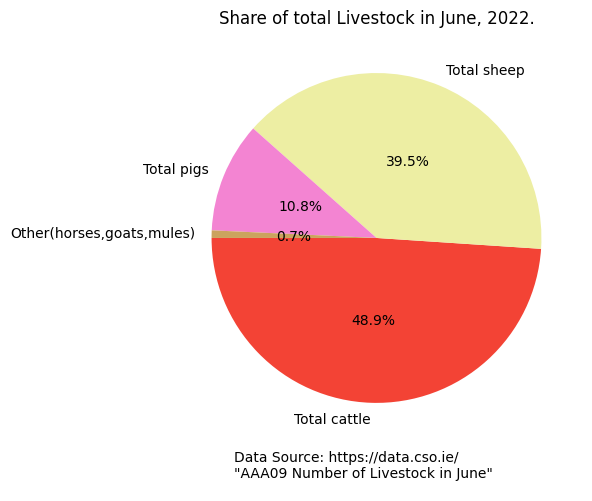

In [117]:
colors=["#F34335", "#EDEEA3", "#F384D2", "#CBA35E"]
explode = (0.0, 0.0, 0.0, 0.0)
plt.pie(top_3['VALUE'], labels=top_3['Type of Animal'],explode=explode, colors=colors, autopct='%1.1f%%',pctdistance=.5, startangle=180)

#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Share of total Livestock in June, 2022.')

plt.subplots_adjust(left=0.24, right=0.98, top=0.999, bottom=0.14)
plt.text(0.09, -0.105, "Data Source: https://data.cso.ie/ \n\"AAA09 Number of Livestock in June\"", ha='left', transform=ax.transAxes)

plt.savefig("LivestockShare-"+str(year)+".png")

plt.show()

In [118]:
df = getCSV(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\CowsPerCounty.csv') 
print(df)

               STATISTIC Label  Year        Type of Cattle         County  \
0     Number of Cattle in June  2015          Total cattle    Co. Leitrim   
1     Number of Cattle in June  2015          Total cattle      Co. Sligo   
2     Number of Cattle in June  2015          Total cattle      Co. Cavan   
3     Number of Cattle in June  2015          Total cattle    Co. Donegal   
4     Number of Cattle in June  2015          Total cattle   Co. Monaghan   
...                        ...   ...                   ...            ...   
3323  Number of Cattle in June  2022  Total cattle: female    Co. Wicklow   
3324  Number of Cattle in June  2022  Total cattle: female      Co. Laois   
3325  Number of Cattle in June  2022  Total cattle: female   Co. Longford   
3326  Number of Cattle in June  2022  Total cattle: female     Co. Offaly   
3327  Number of Cattle in June  2022  Total cattle: female  Co. Westmeath   

          UNIT    VALUE  
0     000 Head   65.000  
1     000 Head  113.500

In [148]:
year = 2020
filtered_df = df[(df['Year']==year)&(df['Type of Cattle']=='Total cattle')]
filtered_df['County'] = filtered_df['County'].apply(lambda x: x[4:].upper()) 
print(filtered_df)

               STATISTIC Label  Year Type of Cattle     County      UNIT  \
2080  Number of Cattle in June  2020   Total cattle    LEITRIM  000 Head   
2081  Number of Cattle in June  2020   Total cattle      SLIGO  000 Head   
2082  Number of Cattle in June  2020   Total cattle      CAVAN  000 Head   
2083  Number of Cattle in June  2020   Total cattle    DONEGAL  000 Head   
2084  Number of Cattle in June  2020   Total cattle   MONAGHAN  000 Head   
2085  Number of Cattle in June  2020   Total cattle     GALWAY  000 Head   
2086  Number of Cattle in June  2020   Total cattle       MAYO  000 Head   
2087  Number of Cattle in June  2020   Total cattle  ROSCOMMON  000 Head   
2088  Number of Cattle in June  2020   Total cattle      CLARE  000 Head   
2089  Number of Cattle in June  2020   Total cattle   LIMERICK  000 Head   
2090  Number of Cattle in June  2020   Total cattle  TIPPERARY  000 Head   
2091  Number of Cattle in June  2020   Total cattle     CARLOW  000 Head   
2092  Number

C:\Users\Tom\AppData\Local\Temp\ipykernel_22216\580069788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['County'] = filtered_df['County'].apply(lambda x: x[4:].upper())


In [149]:
counties_shapefile = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\Ireland_Counties\Counties___Ungen_2019.shp')
merged_data = counties_shapefile.merge(filtered_df, how='left', left_on='ENGLISH', right_on='County')
print(merged_data)

    OBJECTID   CO_ID    ENGLISH            GAEILGE LOGAINM_ID  \
0          1   50000    DONEGAL       Dún na nGall     100013   
1          2  120000   LIMERICK          Luimneach     100022   
2          3   80000    KILDARE          Cill Dara     100007   
3          4  220000  WATERFORD        Port Láirge     100026   
4          5  260000     DUBLIN  Baile Átha Cliath     100002   
5          6  230000  WESTMEATH          An Iarmhí     100016   
6          7  170000   MONAGHAN         Muineachán     100025   
7          8  250000    WICKLOW      Cill Mhantáin     100008   
8          9   40000       CORK           Corcaigh     100010   
9         10   70000      KERRY            Ciarraí     100005   
10        11  190000  ROSCOMMON         Ros Comáin     100027   
11        12  240000    WEXFORD        Loch Garman     100019   
12        13  130000   LONGFORD        An Longfort     100020   
13        14  160000      MEATH             An Mhí     100024   
14        15   20000     

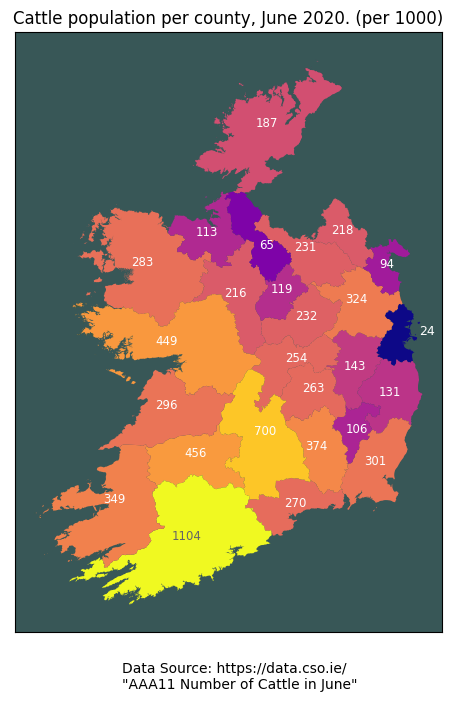

In [150]:
def plotIreland(data, year, savefig):
    fig, ax = plt.subplots(1,1,figsize=(12,8))

    data['scaled_value'] = np.log1p(data['VALUE'])

    data.plot(column='scaled_value', cmap='plasma', linewidth=0.8, ax=ax, legend=False)

    text_color = "#FEFEFE"
    font_size = 8.5
    for idx,row in data.iterrows():
        raw_pop_of_county = int(row['VALUE'])
        if row['ENGLISH'] == "DUBLIN":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+23000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color="#FFFFFF", 
                            fontsize=font_size+.5, 
                            ha='center')
        elif row['ENGLISH'] == "OFFALY":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']+9000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "CORK":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+14000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color="#656565", 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "WESTMEATH":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+4000, row['CENTROID_Y']-3000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "SLIGO":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']-5000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "ROSCOMMON":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+4000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "LEITRIM":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+7000, row['CENTROID_Y']-10000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "KERRY":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+12000, row['CENTROID_Y']+3000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        else:
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')  # Adjust ha and va as needed
    title_string = "Cattle population per county, June "+str(year)+". (per 1000)"
    ax.set_title(title_string)

    ax.set_facecolor('#385757') 
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
    plt.text(0.25, -0.095, "Data Source: https://data.cso.ie/ \n\"AAA11 Number of Cattle in June\"", ha='left', transform=ax.transAxes)


    if savefig == True:
        print("Image saved")
        plt.savefig("CowsCounty-"+str(year)+".png")

    plt.show()
plotIreland(merged_data, year, False)